In [ ]:
!pip install --upgrade --user google-cloud-aiplatform langchain langchain-google-genai docarray langchain_core langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
from google.colab import userdata

if "GOOGLE_API_KEY" not in os.environ:
  os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_API_KEY")

In [ ]:
import requests

image_url = "https://d2908q01vomqb2.cloudfront.net/fc074d501302eb2b93e2554793fcaf50b3bf7291/2023/02/13/adverse_1-1024x546.png"
content = requests.get(image_url).content

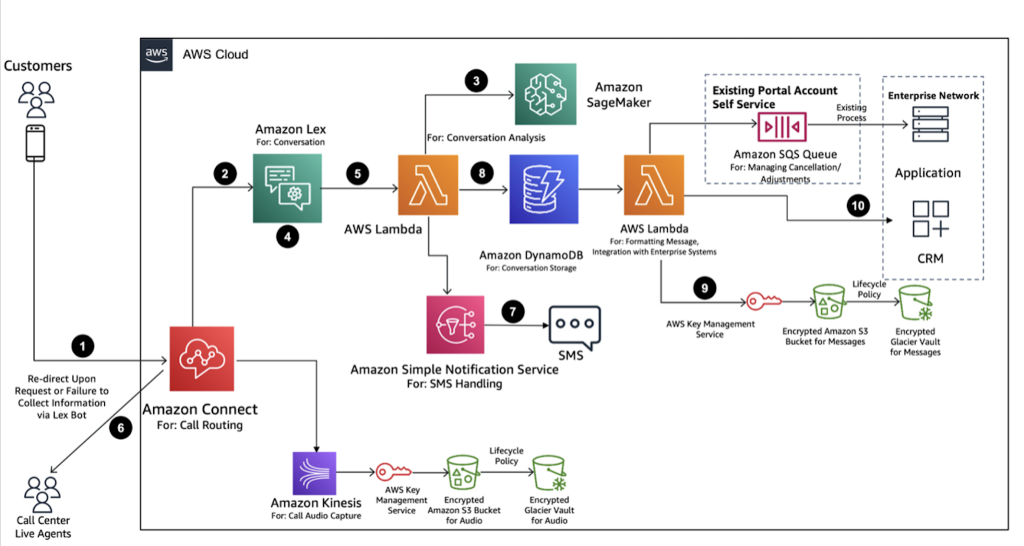

In [ ]:
from IPython.display import Image
Image(content)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

from langchain_core.pydantic_v1 import BaseModel, Field

class Flashcard(BaseModel):
    concept: str = Field(description="The concept of the flashcard")
    definition: str = Field(description="The definition of the flashcard")

from langchain_core.output_parsers import JsonOutputParser
parser = JsonOutputParser(pydantic_object=Flashcard)

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Give me the key concepts of what you see in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
        {"type": "text", "text": f"In this format: {parser.get_format_instructions()}"}
    ]
)
response = llm.invoke([message]).content

In [ ]:
response

' ```json\n{\n  "concepts": [\n    {\n      "concept": "Amazon Connect",\n      "definition": "A cloud-based contact center solution that provides a variety of features, such as call routing, automatic call distribution, and customer self-service."\n    },\n    {\n      "concept": "Amazon Lex",\n      "definition": "A natural language understanding service that allows you to build chatbots and other voice-enabled applications."\n    },\n    {\n      "concept": "Amazon SageMaker",\n      "definition": "A machine learning platform that allows you to build, train, and deploy machine learning models."\n    },\n    {\n      "concept": "AWS Lambda",\n      "definition": "A serverless computing service that allows you to run code without having to manage servers."\n    },\n    {\n      "concept": "Amazon DynamoDB",\n      "definition": "A NoSQL database service that provides fast and scalable storage for your data."\n    },\n    {\n      "concept": "Amazon SQS",\n      "definition": "A messag

In [ ]:
parser.parse(response)

{'concepts': [{'concept': 'Amazon Connect',
   'definition': 'A cloud-based contact center solution that provides a variety of features, such as call routing, automatic call distribution, and customer self-service.'},
  {'concept': 'Amazon Lex',
   'definition': 'A natural language understanding service that allows you to build chatbots and other voice-enabled applications.'},
  {'concept': 'Amazon SageMaker',
   'definition': 'A machine learning platform that allows you to build, train, and deploy machine learning models.'},
  {'concept': 'AWS Lambda',
   'definition': 'A serverless computing service that allows you to run code without having to manage servers.'},
  {'concept': 'Amazon DynamoDB',
   'definition': 'A NoSQL database service that provides fast and scalable storage for your data.'},
  {'concept': 'Amazon SQS',
   'definition': 'A message queuing service that allows you to decouple different parts of your application.'},
  {'concept': 'Amazon SNS',
   'definition': 'A noti